# Walmart Sales Data Cleaning and Analysis

## Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv("Walmart_Store_sales.csv",  parse_dates=['Date'], dayfirst=True)

In [2]:
data.head() #default displays the first five rows from the dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.info() # gives the basics information about our dataset like dimension, No. of nulls, datatype of the columns
data.max() #Finds the Maximum value in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Store                            45
Date            2012-10-26 00:00:00
Weekly_Sales             3818686.45
Holiday_Flag                      1
Temperature                  100.14
Fuel_Price                    4.468
CPI                      227.232807
Unemployment                 14.313
dtype: object

In [4]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Question 1 - Which Store has maximum sales in this dataset?

In [5]:
data.loc[data['Weekly_Sales'] == data['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


### Question 2: Which store does it have the maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of variance (CoV)

In [6]:
maxstd=pd.DataFrame(data.groupby('Store').agg({'Weekly_Sales': ['std', 'mean']}))
maxstd = maxstd.reset_index()

maxstd["CoV"] = (maxstd['Weekly_Sales','std']/maxstd['Weekly_Sales','mean']) * 100
maxstd.head()

maxstd.loc[maxstd['Weekly_Sales','std'] == maxstd['Weekly_Sales','std'].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

### Question 3 - Which store/s has good quarterly growth rate in Q3'2012?

In [7]:
# Converting the data type of date column to dataTime
data['Date'] = pd.to_datetime(data['Date'])


# Defining the start and end date of Q3 and Q2
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))


# Collecting the data of Q3 and Q2 from original dataset
Q2data=data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3data=data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]

# Finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'}, inplace=True)

# Finding the sum weekly sales of each store in Q3
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'}, inplace=True)

# Merging Q2 and Q3 data on Store as a common column
Q3_Growth = Q2.merge(Q3,how="inner",on='Store')

# Calculating Growth of each store and collecting it into a dataframe
Q3_Growth['Growth_Rate'] = (Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales']) / Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate'] = round(Q3_Growth['Growth_Rate'],2)

Q3_Growth.sort_values('Growth_Rate', ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
6,7,7290859.27,8262787.39,0.13


In [8]:
Q3_Growth.sort_values('Growth_Rate', ascending=False).tail(1)


,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,25155535.41,21187560.65,-0.16


Question 4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [9]:
# Find the mean sales of non holiday and holiday
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [10]:
# Marking the holiday dates
Christmas1 = pd.Timestamp(2010,12,31)
Christmas2 = pd.Timestamp(2011,12,30)
Christmas3 = pd.Timestamp(2012,12,28)

Thanksgiving1 = pd.Timestamp(2010,11,26)
Thanksgiving2 = pd.Timestamp(2011,11,25)
Thanksgiving3 = pd.Timestamp(2012,11,23)

LabourDay1 = pd.Timestamp(2010,9,10)
LabourDay2 = pd.Timestamp(2011,9,9)
LabourDay3 = pd.Timestamp(2012,9,7)

SuperBowl1 = pd.Timestamp(2010,2,12)
SuperBowl2 = pd.Timestamp(2011,2,11)
SuperBowl3 = pd.Timestamp(2012,10,5)

# Calculating the mean sales during the holidays
Christmas_mean_sales = data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3)]
Thanksgiving_mean_sales = data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3)]
LabourDay_mean_sales = data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3)]
SuperBowl_mean_sales = data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3)]

# 
list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales': round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : round(data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean(),2)}

list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1042427.29,
 'SuperBowl_mean_sales': 1061033.41,
 'Non holiday weekly sales': 1041256.38}

Question 5: Provide a Monthly, Quaterly and Semester View of sales in units and give insights

Text(0, 0.5, 'Weekly_Sales')

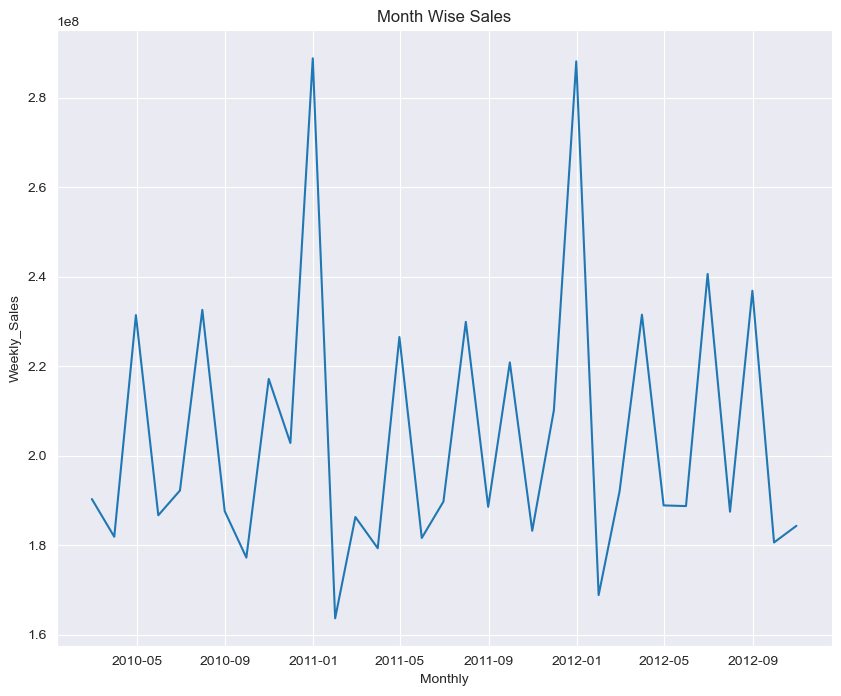

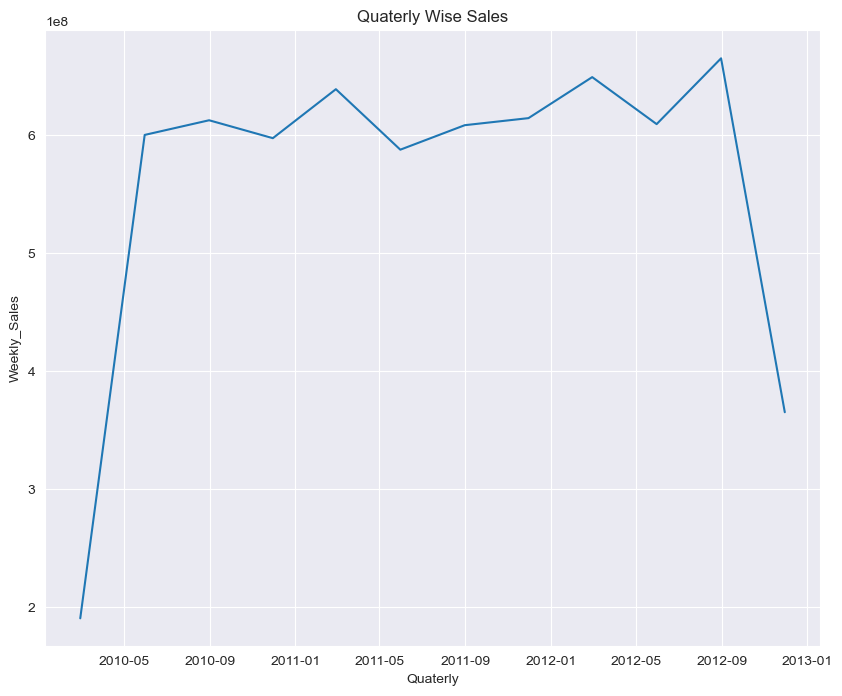

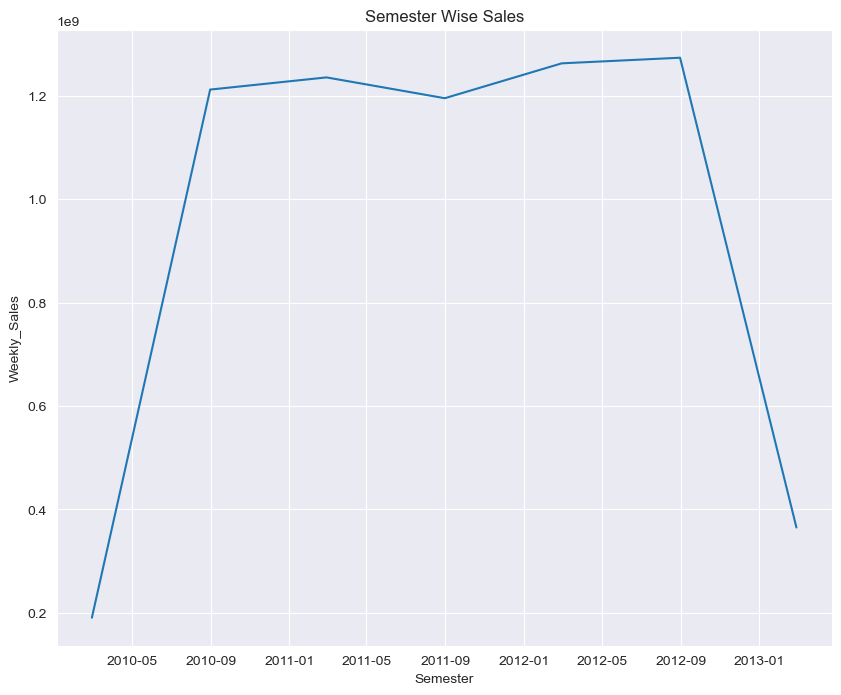

In [11]:
#Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

#Quaterly Sales 
Quaterly = data.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')

#Semester Sales 
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')